In [22]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter

import numpy as np
import matplotlib.pyplot as plt

# Récupération de la structure de ZrSiPd

In [23]:
key = "cBffMzOkc37GR0iu9dXW"
material = "mp-961661"
material_name = "ZrSiPd"
with MPRester(key) as m:
    
    #La ligne suivante permet d'étudier la cellule primitive 
    #struct = m.get_structure_by_material_id(material)
    
    #La ligne suivante permet d'étudier la cellule conventionnelle 
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.")
    display(FileLink(material+".cif"))

Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.


/home/users/p/f/pfranqui/mp-961661.cif

# Téléchargement de la structure de bandes électroniques de ZrSiPd

Diagramme de la structure de bandes électroniques de ZrSiPd :


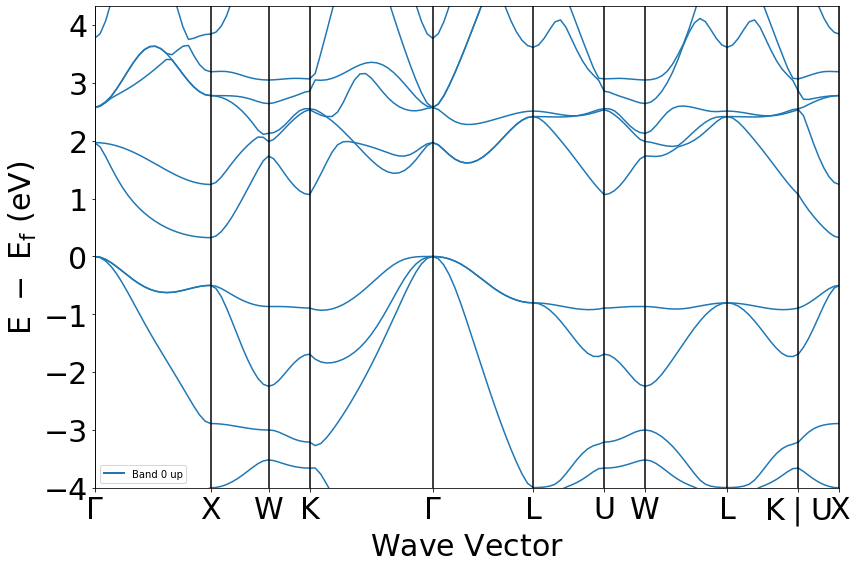

In [24]:
band = m.get_bandstructure_by_material_id(material)
bplot = BSPlotter(band)
print("Diagramme de la structure de bandes électroniques de ZrSiPd :")
bplot.show()

# Analyse de la structure de bandes électroniques de ZrSiPd

## Bande interdite 

{'direct': False, 'energy': 0.3250000000000002, 'transition': '\\Gamma-X'}


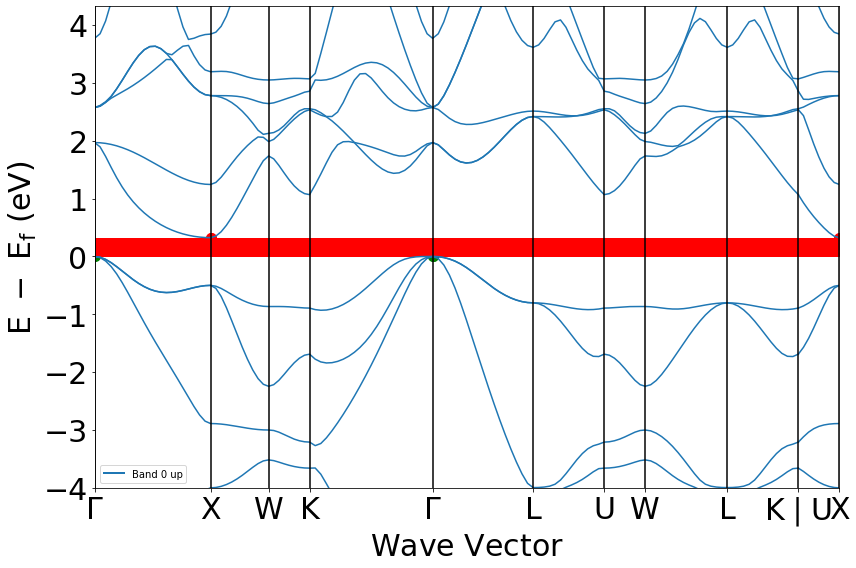

In [25]:
bplot.get_plot(vbm_cbm_marker = True)
D = data.get('ticks').get('distance')
## Affichage de la bande interdite ##
plt.fill_between(np.linspace(D[0], D[-1], 500), 0, band.get_band_gap().get('energy'), color = "red")

## Récupérer les informations sur la bande interdite ##
print(band.get_band_gap())

Par définition, une bande interdite d'un matériau appelée également gap, est l'intervalle entre la dernière bande de valence et la première bande de conduction, dans lequel la densité d'états électroniques est nulle. Elle est représentée par la bande rouge sur le graphe ci-dessus. 

La fonction et le graphe ci-dessus nous fournissent les informations sur la bande interdite. Notre matériau ZrSiPd est un conducteur étant donné sa bande interdite indirect qui se trouve entre 0eV et 0.325 eV. Un faible champ électrique suffira donc pour faire passer un électron aux niveaux d'énergies supérieurs. La transition à savoir la direction de propagation du vecteur d'onde dans la bande interdite se fait suivant une direction Gamma-X. 

On a bien une bande interdite indirect; on peut facilement le confirmer à l'aide du graphe. Les extremums des bandes de conduction représentés par les points rouges et les extremums des bandes de valence représentés par les points verts ne correspondant pas au même quasi-moment (ne sont pas alignés verticalement). 

## Dispersion

La dispersion est un phénomène décrivant la relation entre l'énergie des électrons en fonction de leur vitesse ou de leur direction de déplacement. En effet, les électrons ayant différentes fréquendes d'onde ne se propagent pas à la même vitesse. Ce phénomène apparait donc dans un milieu dispersif et dépend de la variation d'énergie du vecteur d'onde $k$.

Dans un cristal parfait, la dispersion est négligeable étant donné l'énergie des électrons indépendante de leur quantité de mouvement. Cependant, dans les cristaux réels, la dispersion est significative et surtout à proximité des bords de bande. Elle peut être due à des interactions entre les électrons ou à des interactions entre les électrons et le réseau cristallin.

On cherche le direction dans laquelle se trouve un maximum et un minimum de dispersion pour chaque bande. Une pente maximale correspond à un maximum de dispersion et inversément. 

Les indices des bandes de valence ayant la plus grande énergie (points verts) sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]}) 

Les indices des bandes de conduction ayant la plus faible énergie (points rouges) sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [13]}) 

La dispersion maximale en valeur absolue dans la dernière bande de valence représentée par la flèche rouge sur le graphe correspond à la pente de  1.081696826788801 

La dispersion minimale en valeur absolue dans la dernière bande de valence représentée par la flèche bleue sur le graphe correspond à la pente de  0.07403980824585024 

La dispersion maximale en valeur absolue dans la première bande de conduction représentée par la flèche verte sur le graphe correspond à la pente de  2.750436585509106 

La dispersion minimale en valeur absolue dans la première bande de conduction représenté par la flèche jaune sur le graphe correspond à la pente de  0.5056498629809688 



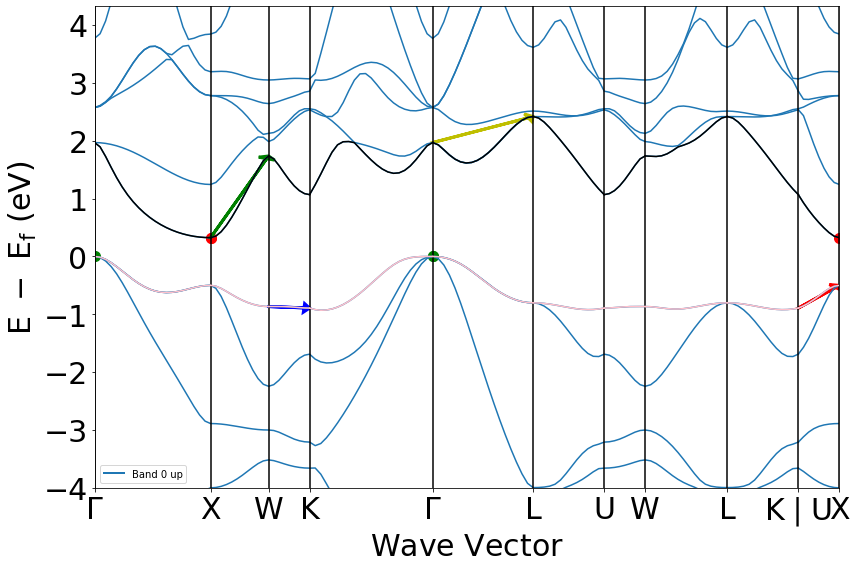

In [26]:
data = bplot.bs_plot_data()
pl = bplot.get_plot(vbm_cbm_marker = True)
E = data.get('energy').get('1')
D = data.get('ticks').get('distance')

## Récupération de la dernière bande de valence ##
vbm = band.get_vbm()
print("Les indices des bandes de valence ayant la plus grande énergie (points verts) sont :" , vbm['band_index'], "\n")   

## Récupération de la première bande de conduction ##
cbm = band.get_cbm()
print("Les indices des bandes de conduction ayant la plus faible énergie (points rouges) sont :" ,cbm['band_index'], "\n")    

Vindex = 12
Cindex = 13

slopeV = np.zeros(10)
slopeC = np.zeros(10)
Dbranch = np.unique(D) 

for i in range(10):
    DeltaD = Dbranch[i+1]-Dbranch[i]
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD) )
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD) )

maxV = np.max(slopeV) #indice 9
minV = np.min(slopeV) #indice 2


print("La dispersion maximale en valeur absolue dans la dernière bande de valence représentée par la flèche rouge sur le graphe correspond à la pente de ",maxV,"\n")
print("La dispersion minimale en valeur absolue dans la dernière bande de valence représentée par la flèche bleue sur le graphe correspond à la pente de ",minV, "\n")

maxC = np.max(slopeC) #indice 1
minC = np.min(slopeC) #indice 4

print("La dispersion maximale en valeur absolue dans la première bande de conduction représentée par la flèche verte sur le graphe correspond à la pente de ",maxC, "\n")
print("La dispersion minimale en valeur absolue dans la première bande de conduction représenté par la flèche jaune sur le graphe correspond à la pente de ",minC, "\n")

## Afficher les directions des dispersions ##
plt.arrow(Dbranch[9], (E[9][Vindex])[0],Dbranch[10] - Dbranch[9], (E[9][Vindex])[-1] - (E[9][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[2], (E[2][Vindex])[0], Dbranch[3] -Dbranch[2], (E[2][Vindex])[-1] - (E[2][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[1], (E[1][Cindex])[0], Dbranch[2] - Dbranch[1], (E[1][Cindex])[-1] - (E[1][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[4], (E[4][Cindex])[0], Dbranch[5] - Dbranch[4], (E[4][Cindex])[-1] - (E[4][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

## Afficher la dernière bande de valence et la première bande de conduction ##
distances = data.get('distances')
for i in range(len(distances)):
    plt.plot(distances[i],E[i][12],'pink')
    plt.plot(distances[i],E[i][13],'black')
    
plt.show()

### Analyse de la dispersion dans la dernière bande de valence 

Les bandes 10, 11 et 12 représentent les bandes de valence ayant les plus grandes énergies. Ces extremums sont représentés par les points verts sur le graphe ci-dessus. La dernière bande de valence est donc la bande 12 et est représentée en rose. 

La pente maximale de la dernière bande de valence vaut 1.081696826788801 et se situe entre K|UX. Dès lors, la dernière bande de valence présente une dispersion maximale selon la direction K|UX comme indiqué par la flèche rouge.

La pente minimale de la dernière bande de valence vaut -0.07403980824585024  et se situe entre W et K. Dès lors, la dernière bande de valence présente une dispersion minimale selon la direction W-K comme indiqué par la flèche bleue.

### Analyse de la dispersion dans la première bande de conduction

La bande d'indice 12 représente la bande de conduction ayant les plus faibles énergies. Ces extremums sont représentés par les point rouges sur le graphe ci-dessus. La première bande de conduction est dans la bande 13 et est représenté en noir. 

La pente maximale de la première bande de conduction vaut 2.750436585509106 et se situe entre X et W. Dès lors, la première bande de conduction présente une dispersion maximale selon la direction X-W comme indiqué par la flèche verte.

La pente minimale de la première bande de conduction est 0.5056498629809688 et se situe entre Gamma et L. Dès lors, la première bande de conduction présente une dispersion minimale selon la direction Gamma-L comme indiqué par la flèche jaune.

## Masse effective 

Les électrons sont souvent décrits comme des partiules libres dont la masse effective varie plutôt que des particules de masse ficée évoluant dans un potentiel. Cette masse effective peut-être positive ou négative, supérieure ou inférieure à la masse réelle de l'électron à savoir $m_e = 9.109e-31 [kg]$. 

La masse effective est définie par le tenseur dordre deux des dérivées secondes de l'énergie $E$ par rapport au vecteur d'onde $k$ : 

$$m^*_{ij} = (\frac{\partial^2 E}{\partial k_i \partial k_j})^{-1}$$

Grâce à notre hypothèse de dispersion parabolique, la masse effective peut se calculer de la manière suivante : 

$$m^* = \frac{\hbar^2 k^2}{2\cdot E(k)} = \frac{\hbar^2 (k_x^2 + k_y^2 + k_z^2)}{2\cdot E(k)}$$

où $\hbar$ est la constante de Planck, $E(k)$ est l'énergie d'un électron de vecteur d'onde $k$. 

In [27]:
h_bar = 6.5821e-16

val = band.get_vbm()
E_val = val['energy']
kpoint_val = val['kpoint'].cart_coords

mEffVal = (h_bar**2 * (kpoint_val[0]**2+kpoint_val[1]**2+kpoint_val[2]**2))/(2*abs(E_val))

print("La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique vaut : " + 
      str(mEffVal)+ "[kg]\n")

cond = band.get_cbm()
E_cond = cond['energy']
kpoint_cond = cond['kpoint'].cart_coords

mEffCond = (h_bar**2 * (kpoint_cond[0]**2+kpoint_cond[1]**2+kpoint_cond[2]**2))/(2*abs(E_cond))

print("La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique vaut : " + 
      str(mEffCond) + "[kg]")

La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique vaut : 0.0[kg]

La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique vaut : 4.113634081543992e-32[kg]
